<h1>Summary</h1>

<h3>Logistic Regression</h3>
線形の2クラス分類器は、2つのクラスを分割する直線や平面や超平面（決定境界）となる予測式を求め、この予測式の値が0より小さければクラスは-1に、大きければクラスは+1になる<br>
この予測のルールはすべての線形モデルによるクラス分類に共通する<br>
デフォルトとしてはL2正則化を使った方がよいが、一部の特徴量だけが重要だと思うならばL1正則化を使うべきである<br>
ロジスティック回帰モデルは、線形回帰モデルと同様に、入力特徴量の加重総和（にさらにバイアス項を加えたもの）$h_\theta (\boldsymbol{x})$を計算するが、線形回帰モデルのように計算結果を直接出力するのではなく、結果のロジスティック（logistic）を返す<br>
ロジスティック回帰の損失関数を最小にする$\theta$の値を計算する正規方程式のようなものはないため、勾配降下法などで$\theta$を求めることになる<br>
LogisticRegressionは、3つ以上のクラスで訓練したときにはデフォルトでOVA(one vs all)方を使う

インスタンス$\boldsymbol{x}$が陽性クラスに属する確率 $\hat{p}=h_\theta (\boldsymbol{x})=\sigma (\boldsymbol{x}^T \theta)$

$\sigma(t)=\frac{1}{1+exp(-t)}$：シグモイド関数。0から1までの値を取る

ロジスティック回帰モデルによる予測：$\hat{y}=\{\begin{array}{l}0 \ if \ \hat{p} < 0.5 \\ 1 \ if \ \hat{p} \geq 0.5\end{array}$

損失関数：$J(\theta)=-\frac{1}{m}\sum_{i=1}^{m}[y^{(i)} log(\hat{p}^{(i)}) + (1 - y^{(i)})log(1 - \hat{p}^{(i)})]$

<h4>重要なパラメータ</h4>
・正則化パラメータ C（デフォルトは 1.0）<br>
Cを小さくする⇒係数の制約が強くなる、Cを大きくする⇒係数の制約が弱くなる<br>
・penalty（デフォルトは "l2"）<br>
l1⇒L1正則化、l2⇒L2正則化

<h3>ソフトマックス回帰</h3>
ロジスティック回帰モデルは、3つ以上のクラスで訓練したときにはデフォルトでOVA(one vs all)方を使うが、それを使わなくても複数のクラスを直接サポートできるように一般化できる。これをソフトマックス回帰、あるいは多項ロジスティック回帰と呼ぶ<br>
ソフトマックス回帰モデルは、インスタンス$\boldsymbol{x}$を受け取ると、そのインスタンスの個々のクラスkにおけるクラススコア$s_k(\boldsymbol{x})$を計算してから、ソフトマックス関数を適用してインスタンスがクラスkに属する確率$\hat{p}_k$を推計する<br>
ロジスティック回帰分類器と同様に、ソフトマックス回帰分類器は推計された確率がもっとも高いクラス（単純にもっともクラススコアの高いクラスのことである）を予測として返す。つまり、1度に1つのクラスだけを予測するため、多出力ではない<br>

$s_k(\boldsymbol{x})=\boldsymbol{x}^T \theta^{(k)}$<br>
個々のクラスがそれぞれ専用のパラメータベクトル$\theta^{(k)}$を持っていることに注意。一般に、これらのベクトルは全体としてパラメータ行列$ \Theta$に格納される

ソフトマックス関数：$\hat{p}_k=\frac{exp(s_k(\boldsymbol{x}))}{\sum_{j=1}^{K} exp(s_j(\boldsymbol{x}))}$<br>
ソフトマックス関数は、すべてのスコアの指数を計算してから、結果を正規化する（すべての指数の合計で割る）

損失関数：$J(\Theta)=-\frac{1}{m}\sum_{i=1}^{m} \sum_{k=1}^{K} {y_k}^{(i)} log({\hat{p}_k}^{(i)})$<br>
要は「インスタンスが実際に所属しているクラスに属する確率」の全インスタンスの和が最大（-ついてるから）になるような$\Theta$を見つける

<h4>重要なパラメータ</h4>
※関数はロジスティック回帰と同じ<br>
・multi_classに"multinomial"をセットするとソフトマックス回帰を使うようになる<br>
・正則化パラメータ C（デフォルトは 1.0）<br>
Cを小さくする⇒係数の制約が強くなる、Cを大きくする⇒係数の制約が弱くなる<br>
・penalty（デフォルトは "l2"）<br>
l1⇒L1正則化、l2⇒L2正則化<br>
・solver<br>
Multinomial + L2 penalty ⇒‘lbfgs’ & ‘newton-cg’ & ‘sag’ & ‘saga’<br>
Multinomial + L1 penalty ⇒‘saga’

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

In [2]:
import mglearn

<h1>Logistic Regression</h1>

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [4]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state = 42)

In [5]:
logreg = LogisticRegression(max_iter = 10000).fit(X_train, y_train)
print(f"Training set score: {logreg.score(X_train, y_train):.3f}")
print(f"Test set score: {logreg.score(X_test, y_test):.3f}")

Training set score: 0.958
Test set score: 0.958


In [6]:
logreg100 = LogisticRegression(C = 100, max_iter = 10000).fit(X_train, y_train)
print(f"Training set score: {logreg100.score(X_train, y_train):.3f}")
print(f"Test set score: {logreg100.score(X_test, y_test):.3f}")

Training set score: 0.981
Test set score: 0.965


In [7]:
logreg001 = LogisticRegression(C = 0.01, max_iter = 10000).fit(X_train, y_train)
print(f"Training set score: {logreg001.score(X_train, y_train):.3f}")
print(f"Test set score: {logreg001.score(X_test, y_test):.3f}")

Training set score: 0.953
Test set score: 0.951


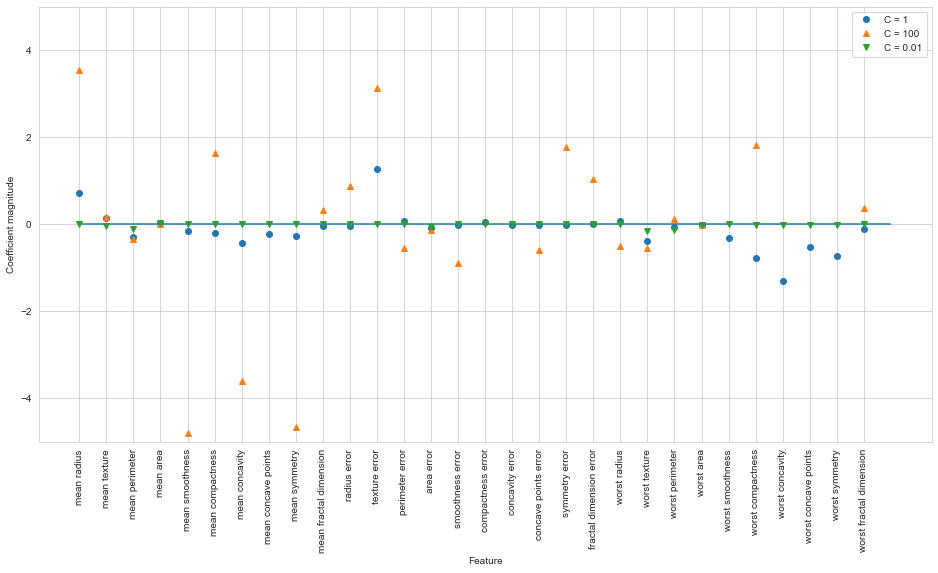

In [8]:
plt.figure(figsize = (16, 8))

plt.plot(logreg.coef_.reshape(-1), "o", label = "C = 1")
plt.plot(logreg100.coef_.reshape(-1), "^", label = "C = 100")
plt.plot(logreg001.coef_.reshape(-1), "v", label = "C = 0.01")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation = 90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()

Training accuracy of l1 logreg with C = 0.01:  0.92
Test accuracy of l1 logreg with C = 0.01:  0.93
Training accuracy of l1 logreg with C = 1.00:  0.96
Test accuracy of l1 logreg with C = 1.00:  0.96
Training accuracy of l1 logreg with C = 100.00:  0.99
Test accuracy of l1 logreg with C = 100.00:  0.98


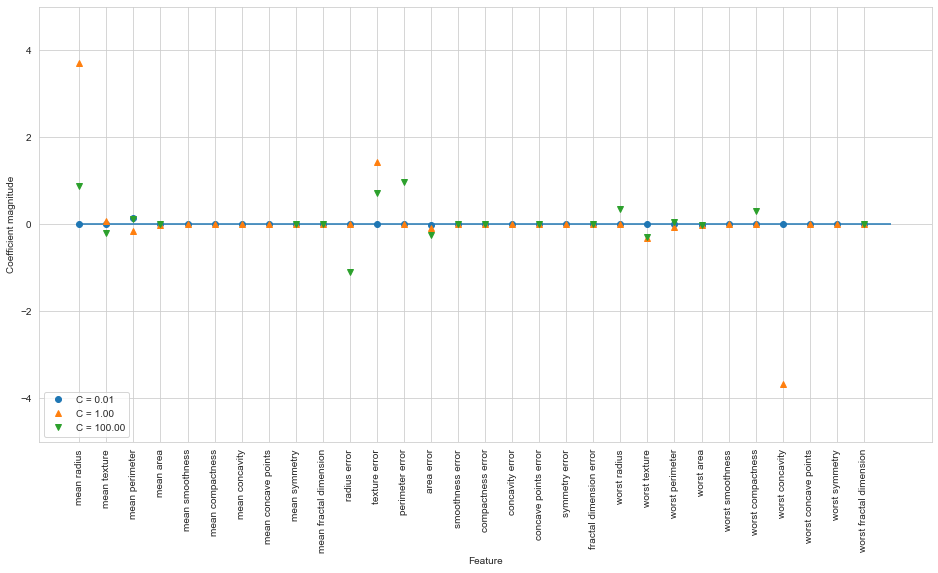

In [9]:
# L1正則化の結果
plt.figure(figsize = (16, 8))
for C, marker in zip([0.01, 1, 100], ["o", "^", "v"]):
    lr_l1 = LogisticRegression(C = C, penalty = "l1", solver = "liblinear", max_iter = 10000).fit(X_train, y_train)
    print(f"Training accuracy of l1 logreg with C = {C :.2f}: {lr_l1.score(X_train, y_train): .2f}")
    print(f"Test accuracy of l1 logreg with C = {C :.2f}: {lr_l1.score(X_test, y_test): .2f}")
    plt.plot(lr_l1.coef_.reshape(-1), marker, label = f"C = {C:.2f}")


plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation = 90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")

plt.ylim(-5, 5)
plt.legend(loc = 3)

(100, 2)
(100,)


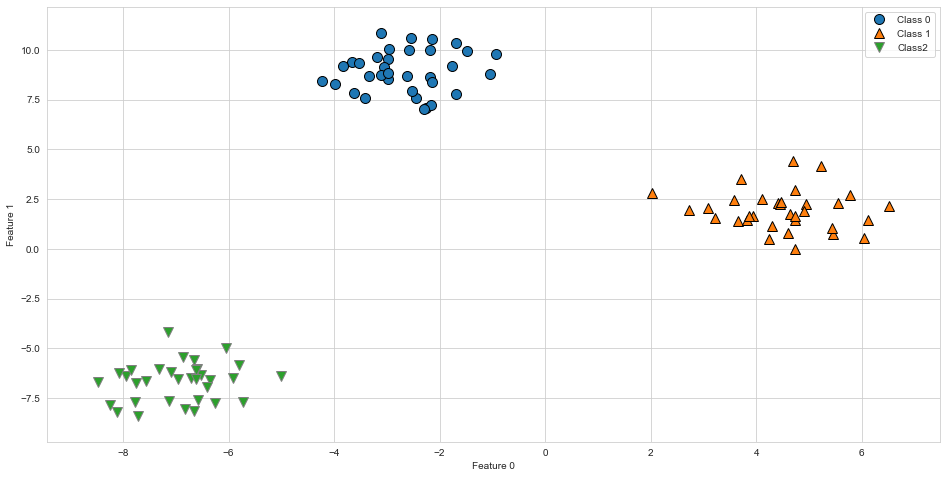

In [10]:
# ロジスティック回帰による多クラス分類
from sklearn.datasets import make_blobs

X,y = make_blobs(random_state = 42)
print(X.shape)
print(y.shape)

plt.figure(figsize = (16, 8))
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class2"])

In [11]:
logreg = LogisticRegression(max_iter = 10000).fit(X, y)
print("Coefficient shape: ", logreg.coef_.shape) # 各クラスに対する係数ベクトル
print("Intercept shape:", logreg.intercept_.shape) # 各クラスに対する切片
print(f"Training set score: {logreg.score(X, y):.3f}")

Coefficient shape:  (3, 2)
Intercept shape: (3,)
Training set score: 1.000


Text(0, 0.5, 'Feature 1')

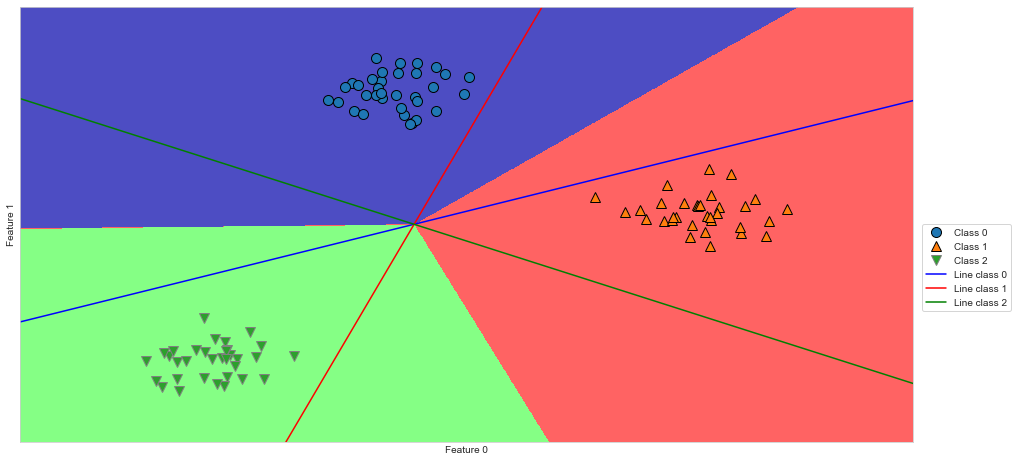

In [12]:
plt.figure(figsize = (16, 8))
mglearn.plots.plot_2d_classification(logreg, X, fill = True, alpha = .7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(logreg.coef_, logreg.intercept_, ["b","r","g"]):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c = color)
plt.legend(["Class 0","Class 1","Class 2","Line class 0","Line class 1","Line class 2"], loc = (1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

<h1>ソフトマックス回帰</h1>

In [13]:
softmax_reg = LogisticRegression(multi_class = "multinomial", solver = "saga", penalty = "l1", C = 10, max_iter = 10000).fit(X, y)
print("Coefficient shape: ", softmax_reg.coef_.shape) # 各クラスに対する係数ベクトル
print("Intercept shape:", softmax_reg.intercept_.shape) # 各クラスに対する切片
print(f"Training set score: {softmax_reg.score(X, y):.3f}")

Coefficient shape:  (3, 2)
Intercept shape: (3,)
Training set score: 1.000
